In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv("Lung-Cancer-Dataset.csv")
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [3]:
df.shape

(59, 7)

In [4]:
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [6]:
df.columns

Index(['Name', 'Surname', 'Age', 'Smokes', 'AreaQ', 'Alkhol', 'Result'], dtype='object')

In [7]:
df.nunique()

Name       49
Surname    49
Age        37
Smokes     16
AreaQ      10
Alkhol      9
Result      2
dtype: int64

In [8]:
df.isnull().sum()

Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64

In [9]:
df['Result'].value_counts()

0    31
1    28
Name: Result, dtype: int64

In [10]:
df['Age'].value_counts()

62    4
33    3
34    3
28    3
26    3
22    2
39    2
35    2
55    2
77    2
37    2
21    2
47    2
44    2
25    2
42    2
63    1
19    1
18    1
75    1
73    1
69    1
27    1
36    1
30    1
31    1
40    1
43    1
45    1
50    1
51    1
52    1
53    1
56    1
58    1
59    1
68    1
Name: Age, dtype: int64

# EDA

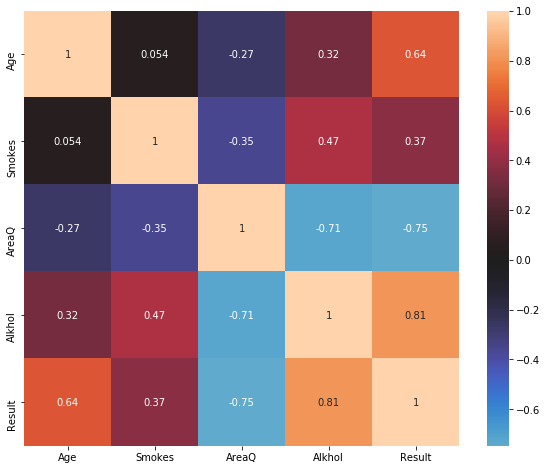

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,square=True,center=0)
plt.show()

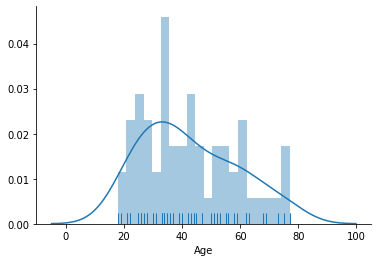

In [12]:
sns.distplot(df['Age'] ,bins=20 ,kde=True,rug=True )
sns.despine()

[]

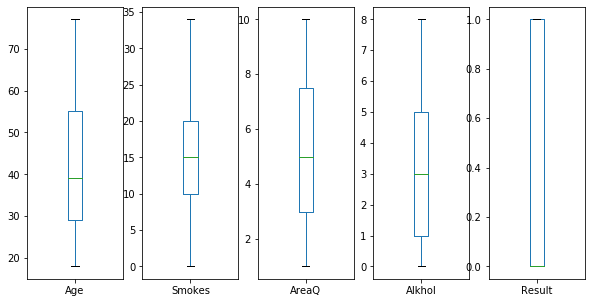

In [13]:
df.plot(kind = 'box', subplots = True, figsize=(10,5))
plt.plot()

[]

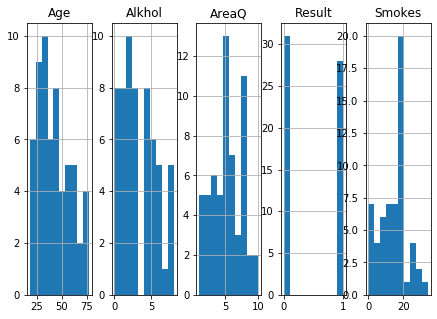

In [14]:
df.hist(layout=(1,20), figsize=(30,5))
plt.plot()

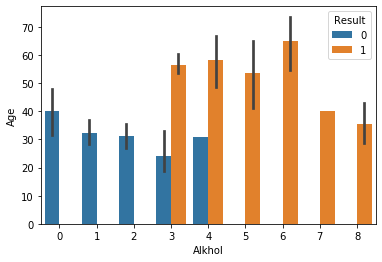

In [15]:
sns.barplot(x=df['Alkhol'],y=df['Age'],hue=df['Result'])

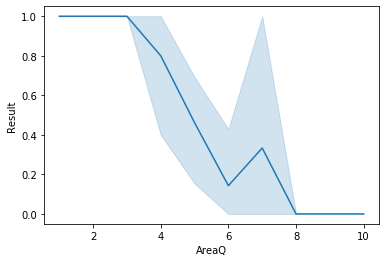

In [16]:
sns.lineplot(x="AreaQ",y="Result",data=df)
plt.show()

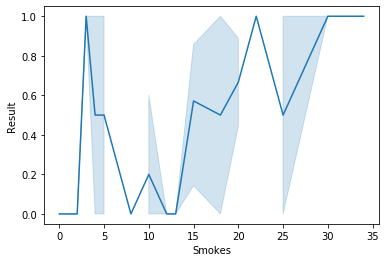

In [17]:
sns.lineplot(x="Smokes",y="Result",data=df)
plt.show()

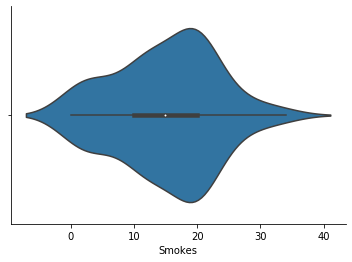

In [18]:
sns.violinplot(x='Smokes',data=df)
sns.despine()

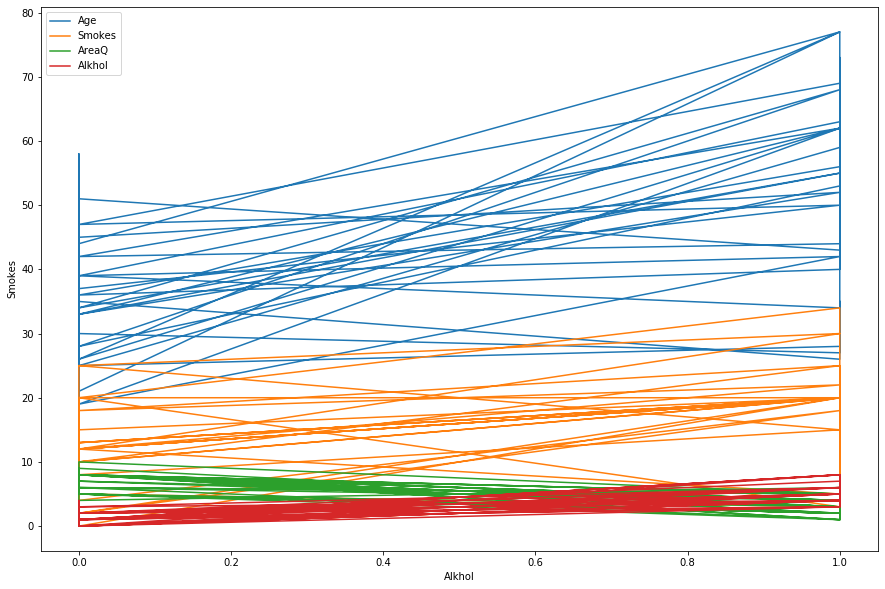

In [19]:
ax = df.set_index('Result').plot(figsize=(15, 10))
ax.set_ylabel('Smokes')
ax.set_xlabel('Alkhol')

plt.show()

Text(0.5, 1.0, 'LUNG CANCER DATSETS')

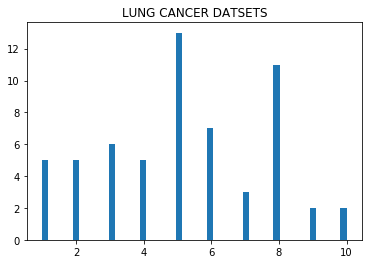

In [20]:
plt.hist(x='AreaQ',data=df,bins=50)
plt.title("LUNG CANCER DATSETS")

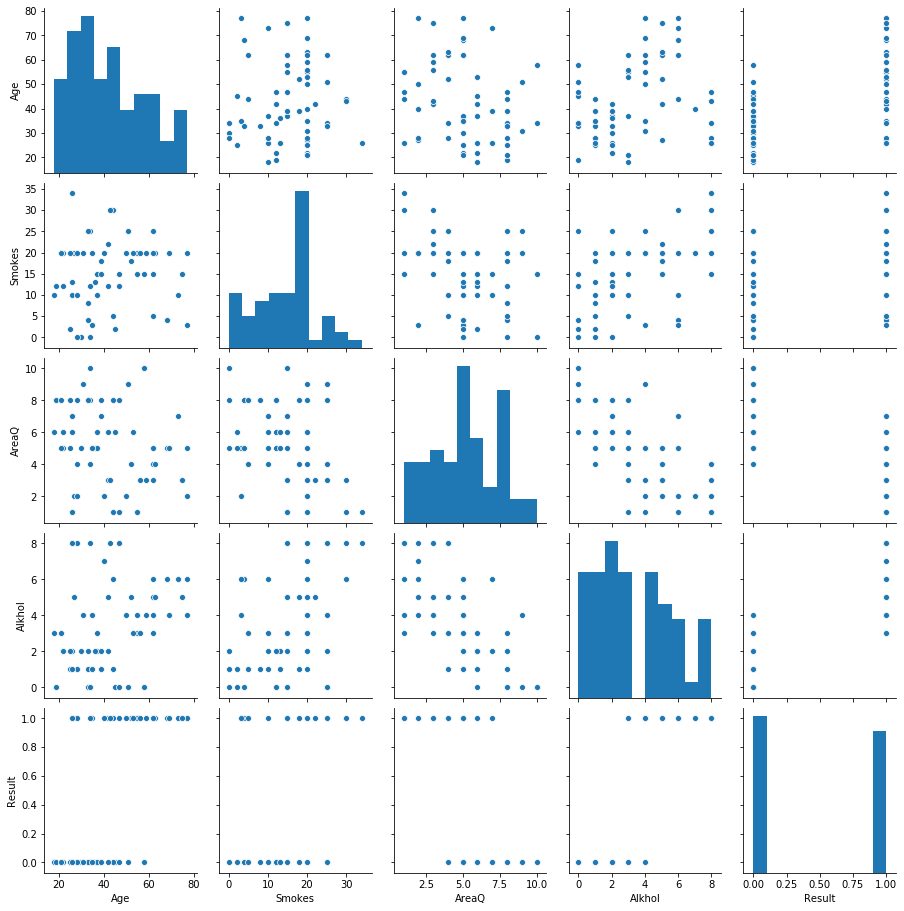

In [21]:
sns.pairplot(df)

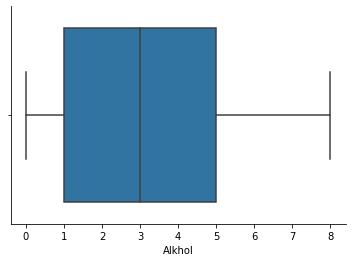

In [22]:
sns.boxplot(x="Alkhol",data=df)
sns.despine()

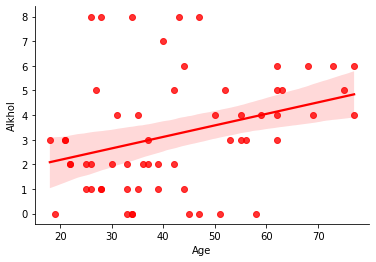

In [23]:
sns.regplot(x="Age",y="Alkhol",color='r',data=df)
sns.despine()

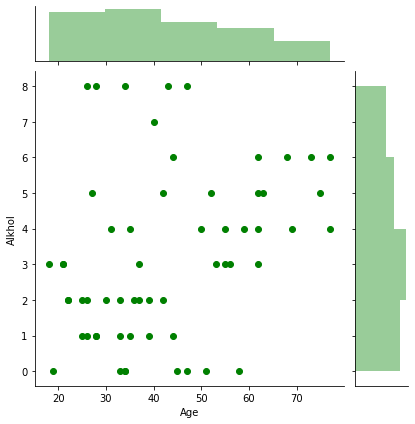

In [24]:
sns.jointplot(x="Age",y="Alkhol",color='g',data=df)
sns.despine()

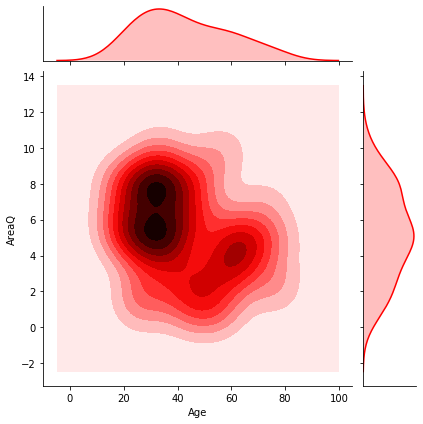

In [25]:
sns.jointplot(x="Age",y="AreaQ",color='r',data=df,kind='kde')
sns.despine()

Text(0, 0.5, 'smoking')

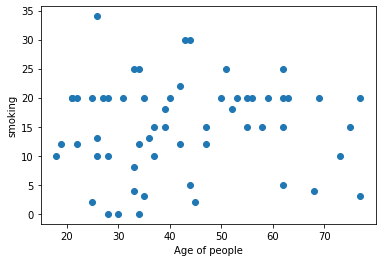

In [26]:
plt.scatter(x='Age' ,y='Smokes',data=df)
plt.xlabel("Age of people")
plt.ylabel("smoking")

Text(0, 0.5, 'Alkhol')

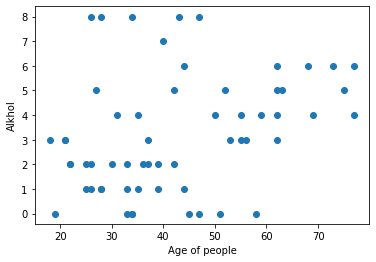

In [27]:
plt.scatter(x='Age' ,y='Alkhol',data=df)
plt.xlabel("Age of people")
plt.ylabel("Alkhol")

# Data Preprocessing

In [28]:
y=df['Result']
x=df.drop(columns=['Name','Surname','Result'],axis=1)

In [29]:
lr=LogisticRegression(random_state=10,C=20)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)
mod=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [31]:
r=classification_report(y_test,y_pred)
print(r)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [32]:
s=confusion_matrix(y_test,y_pred)
s

array([[6, 0],
       [0, 6]], dtype=int64)

In [33]:
kfold = model_selection.KFold(n_splits=10, random_state=10)
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=10, random_state=10)
results = model_selection.cross_val_score(model, x, y, cv=kfold)
score=results.mean()
print('accuracy=',score)

accuracy= 0.95


In [34]:
dual=[True,False]
max_iter=[100,110,120,130,140]
param_grid = dict(dual=dual,max_iter=max_iter)

In [35]:
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

In [36]:
grid_result = grid.fit(x, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.966667 using {'dual': False, 'max_iter': 100}


In [37]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [38]:
rfr = RandomForestRegressor()
grid= GridSearchCV(estimator = rfr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 2)
grid_result = grid.fit(x, y)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   35.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  3.8min finished


In [39]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.831410 using {'bootstrap': True, 'max_depth': 90, 'max_features': 2, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 100}


In [40]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [41]:
lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)
grid_result = grid.fit(x, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.966667 using {'C': 1.0, 'dual': False, 'max_iter': 100}


In [42]:
from sklearn.externals import joblib
joblib.dump(lr,'Lung-Cancer-Dataset.obj')

['Lung-Cancer-Dataset.obj']